In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# importing the data

df = pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [77]:
# taking a quick pick at the data

df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [78]:
# lets get some information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [79]:
# lets get some descriptive statistics of the data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
Rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
Flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
Price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
Sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


**Takeaways:**
-  Nothing really stands our except a really high max value for temperature and the sales
- price is same for every observation
- negative value for the min of flyers

In [80]:
# lets change the uppercase column names to lower case

df.columns = [col.lower() for col in df.columns]

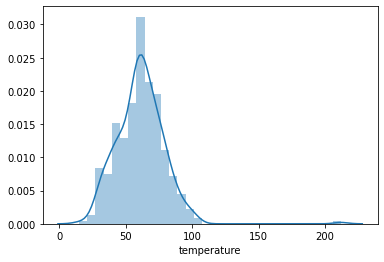

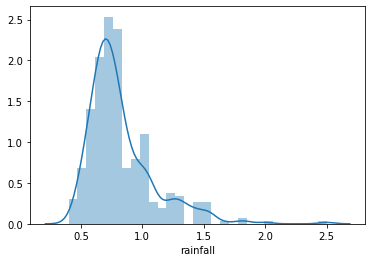

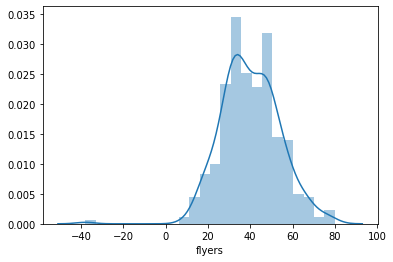

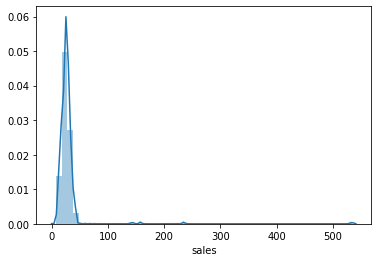

**Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?**

In [84]:
cols_to_check = ['temperature', 'rainfall', 'flyers', 'sales']
n = 1.5
upper_bound = {}
lower_bound = {}
for col in cols_to_check:
    upper_bound[col] = df[col].quantile(0.75) +  n * (df[col].quantile(.75) - df[col].quantile(0.25))
    lower_bound[col] = df[col].quantile(0.25) -  n * (df[col].quantile(.75) - df[col].quantile(0.25))
print(lower_bound)
print('The value do make sense based on the observed value in the dataframe')

{'temperature': 16.700000000000003, 'rainfall': 0.26, 'flyers': 4.0, 'sales': 5.0}
The value do make sense based on the observed value in the dataframe


**Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?**

In [86]:
cols_to_check = ['temperature', 'rainfall', 'flyers', 'sales']
n = 1.5
upper_bound = {}
lower_bound = {}
for col in cols_to_check:
    upper_bound[col] = df[col].quantile(0.75) +  n * (df[col].quantile(.75) - df[col].quantile(0.25))
    lower_bound[col] = df[col].quantile(0.25) -  n * (df[col].quantile(.75) - df[col].quantile(0.25))
print(upper_bound)
print('The value do make sense based on the observed value in the dataframe')

{'temperature': 104.7, 'rainfall': 1.3, 'flyers': 76.0, 'sales': 45.0}
The value do make sense based on the observed value in the dataframe


In [87]:
# lets create a function that checks the outlier using the 1.5 * IQR method


def check_outlier(cols_to_check, n, df):
    '''Takes in a list of columns to check outliers for, the number to multiply the iqr to get the range for outlier 
    and a dataframe and returns a dataframe with the outliers removed'''
    
    
    
    for col in cols_to_check:
        upper_bound = df[col].quantile(0.75) +  n * (df[col].quantile(.75) - df[col].quantile(0.25))
        lower_bound = df[col].quantile(0.25) -  n * (df[col].quantile(.75) - df[col].quantile(0.25))
        df = df[df[col] < upper_bound]
        df = df[df[col] > lower_bound]
    return df

**Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?**

In [89]:
cols_to_check = ['temperature', 'rainfall', 'flyers', 'sales']
n = 3
upper_bound = {}
lower_bound = {}
for col in cols_to_check:
    upper_bound[col] = df[col].quantile(0.75) +  n * (df[col].quantile(.75) - df[col].quantile(0.25))
    lower_bound[col] = df[col].quantile(0.25) -  n * (df[col].quantile(.75) - df[col].quantile(0.25))
print(lower_bound)
print('The value doesnot  make sense based on the observed value in the dataframe')

{'temperature': -16.299999999999997, 'rainfall': -0.13, 'flyers': -23.0, 'sales': -10.0}
The value doesnot  make sense based on the observed value in the dataframe


**Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?**

In [90]:
cols_to_check = ['temperature', 'rainfall', 'flyers', 'sales']
n = 3
upper_bound = {}
lower_bound = {}
for col in cols_to_check:
    upper_bound[col] = df[col].quantile(0.75) +  n * (df[col].quantile(.75) - df[col].quantile(0.25))
    lower_bound[col] = df[col].quantile(0.25) -  n * (df[col].quantile(.75) - df[col].quantile(0.25))
print(upper_bound)
print('The value do make sense based on the observed value in the dataframe')

{'temperature': 137.7, 'rainfall': 1.69, 'flyers': 103.0, 'sales': 60.0}
The value do make sense based on the observed value in the dataframe


**Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:**

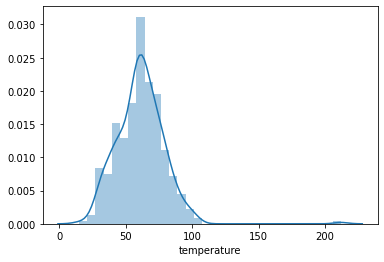

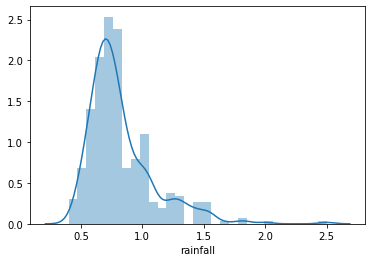

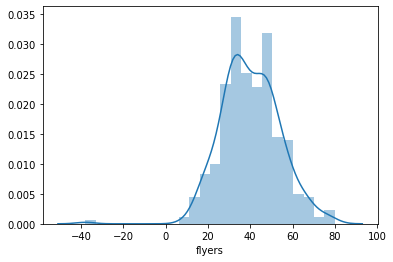

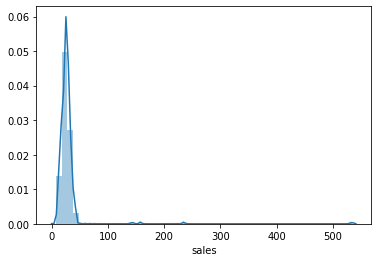

In [91]:
# lets plot the distribution of the data

for col in ['temperature', 'rainfall', 'flyers', 'sales']:
    sns.distplot(df[col])
    plt.show()
    

**Use a 2 sigma decision rule to isolate the outliers.**

- Do these make sense?

- Should certain outliers be kept or removed?

In [94]:
cols_to_check = ['temperature', 'rainfall', 'flyers', 'sales']
upper_bound = {}
lower_bound = {}
for col in cols_to_check:
    two_sigma =  2 * df[col].std()
    upper_bound[col] = df[col].mean() + two_sigma
    lower_bound[col] = df[col].mean() - two_sigma

In [96]:
upper_bound

{'temperature': 97.39644213085184,
 'rainfall': 1.3737531367794353,
 'flyers': 67.67699877341579,
 'sales': 89.76201739593682}

In [97]:
lower_bound

{'temperature': 25.052872937641396,
 'rainfall': 0.27819206870001834,
 'flyers': 12.531220404666406,
 'sales': -34.030510546621755}

**Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv**

In [98]:
cols_to_check = ['temperature', 'rainfall', 'flyers', 'sales']
upper_bound = {}
lower_bound = {}
for col in cols_to_check:
    three_sigma =  3 * df[col].std()
    upper_bound[col] = df[col].mean() + three_sigma
    lower_bound[col] = df[col].mean() - three_sigma

In [99]:
upper_bound

{'temperature': 115.48233442915445,
 'rainfall': 1.6476434037992895,
 'flyers': 81.46344336560313,
 'sales': 120.71014938157646}

In [100]:
lower_bound

{'temperature': 6.966980639338786,
 'rainfall': 0.00430180168016403,
 'flyers': -1.2552241875209376,
 'sales': -64.9786425322614}